In [1]:
# Imported Libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections

# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

from matplotlib import style
style.use('ggplot')

In [3]:
# setting the plot size for graphs:
plt.rcParams['figure.figsize'] = (8,6)

In [4]:
df = pd.read_csv('credit_card.csv')
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


# Q1 EDA

In [5]:
#perform EDA
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [6]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


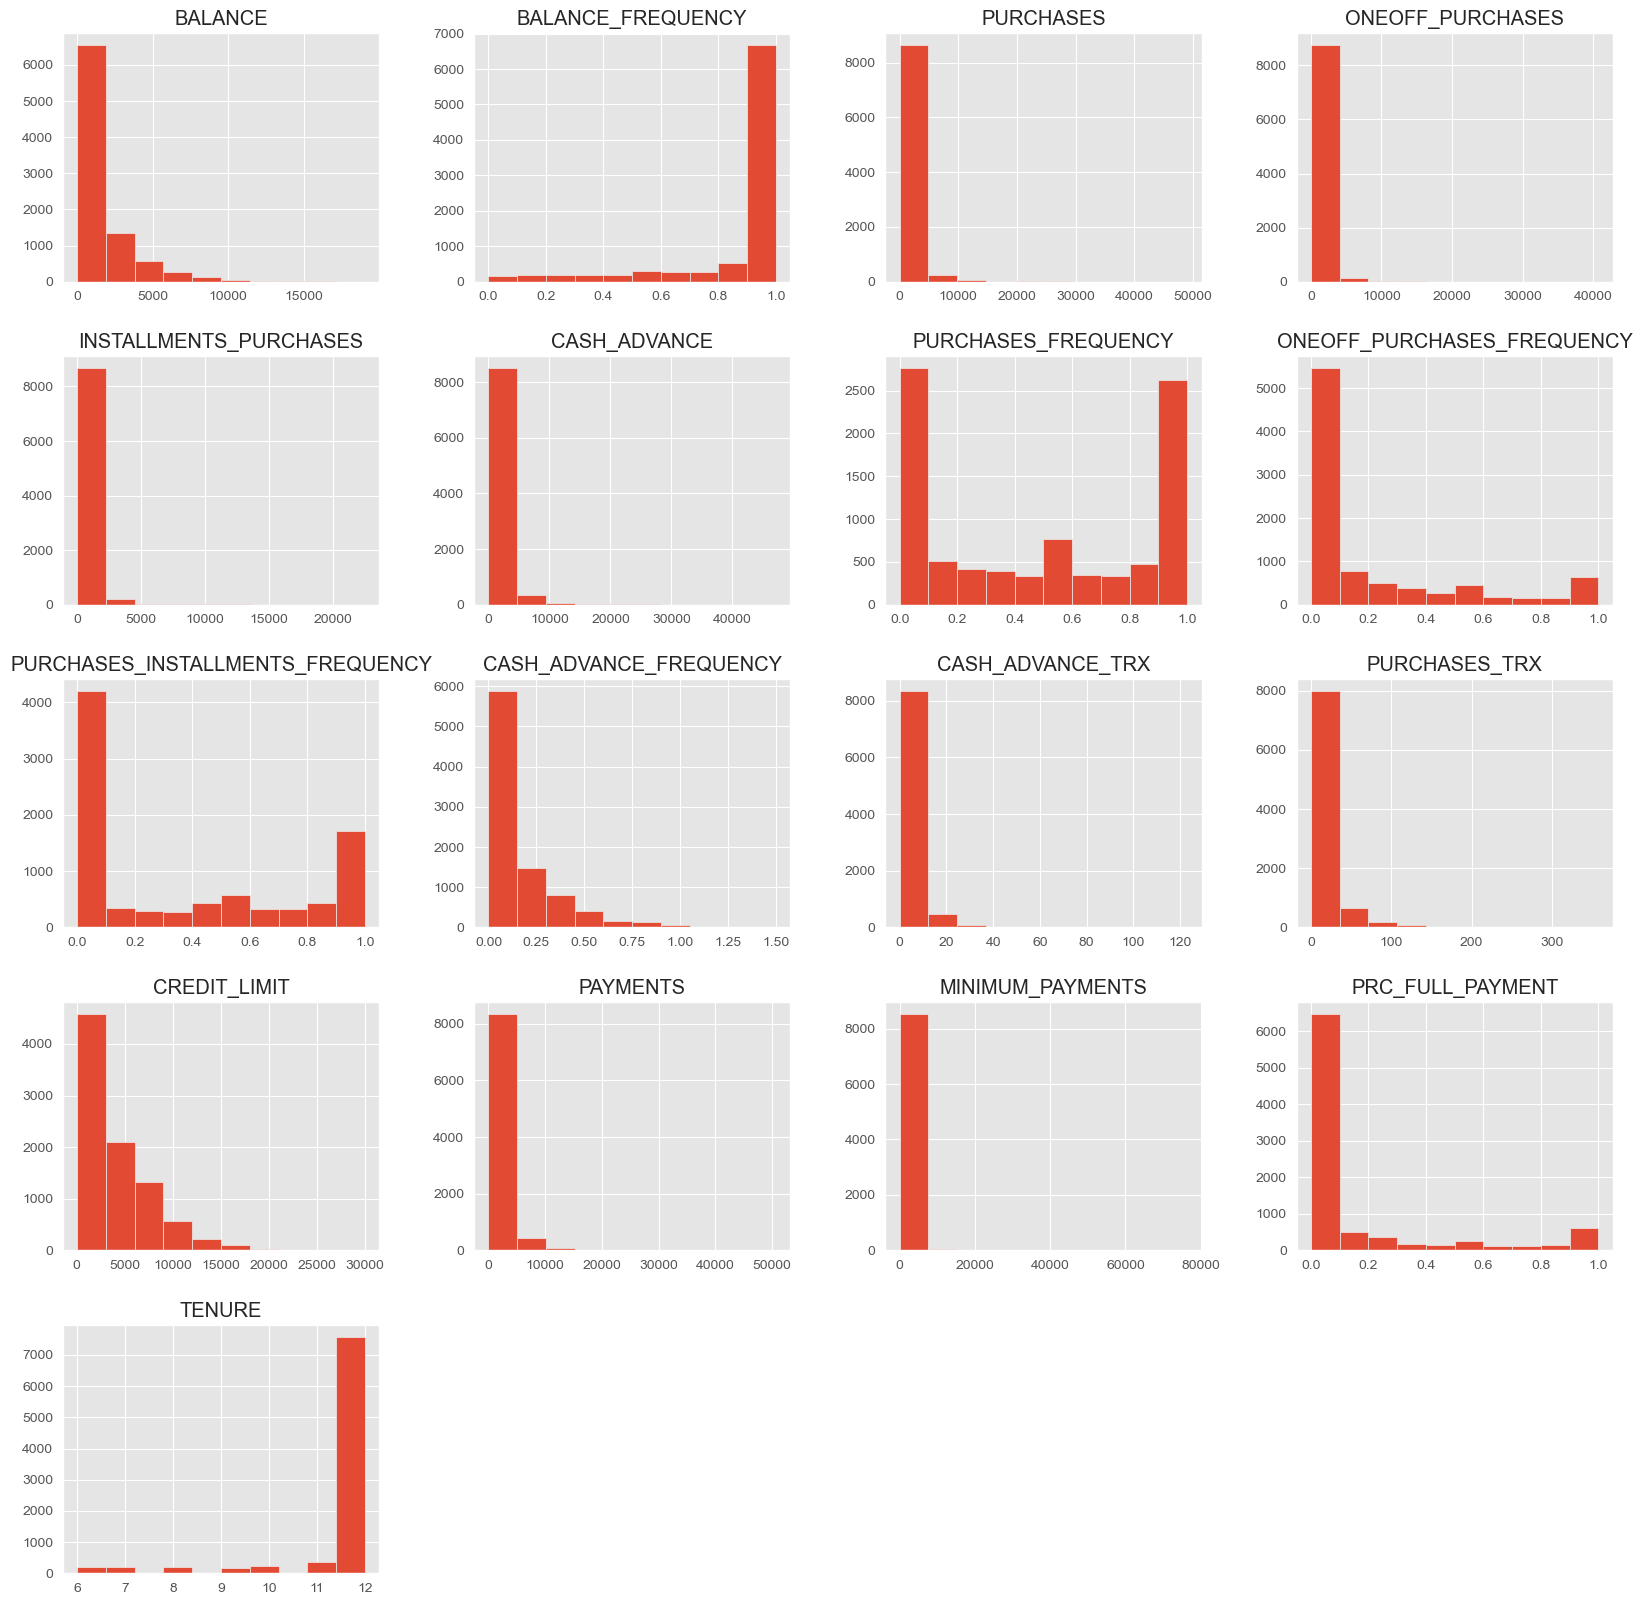

In [7]:
#plot the variable
df.hist(figsize=(20,20))
plt.show()

In [8]:
# Since our classes are highly skewed we should make them equivalent in order to have a normal distribution of the classes.

# Lets shuffle the data before creating the subsamples

df = df.sample(frac=1)
# Shuffle dataframe rows
new_df = df.sample(frac=1, random_state=42)

new_df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
5312,C15463,7395.887570,1.000,0.00,0.00,0.00,4507.523293,0.000000,0.000,0.000000,1.000000,31,0,8500.0,2902.821241,2869.727066,0.000000,12
559,C10583,181.463092,1.000,133.39,133.39,0.00,219.143859,0.250000,0.250,0.000000,0.166667,2,3,2500.0,168.425788,169.473399,0.000000,12
8705,C18942,7302.672686,1.000,0.00,0.00,0.00,10762.707760,0.000000,0.000,0.000000,0.750000,19,0,9000.0,3824.308564,2214.506825,0.000000,12
8336,C18557,105.333584,0.375,306.00,306.00,0.00,0.000000,0.125000,0.125,0.000000,0.000000,0,2,6000.0,101.986927,118.324082,0.000000,8
1128,C11167,20.962217,1.000,290.36,0.00,290.36,0.000000,0.916667,0.000,0.833333,0.000000,0,12,10000.0,255.564130,178.839860,0.727273,12


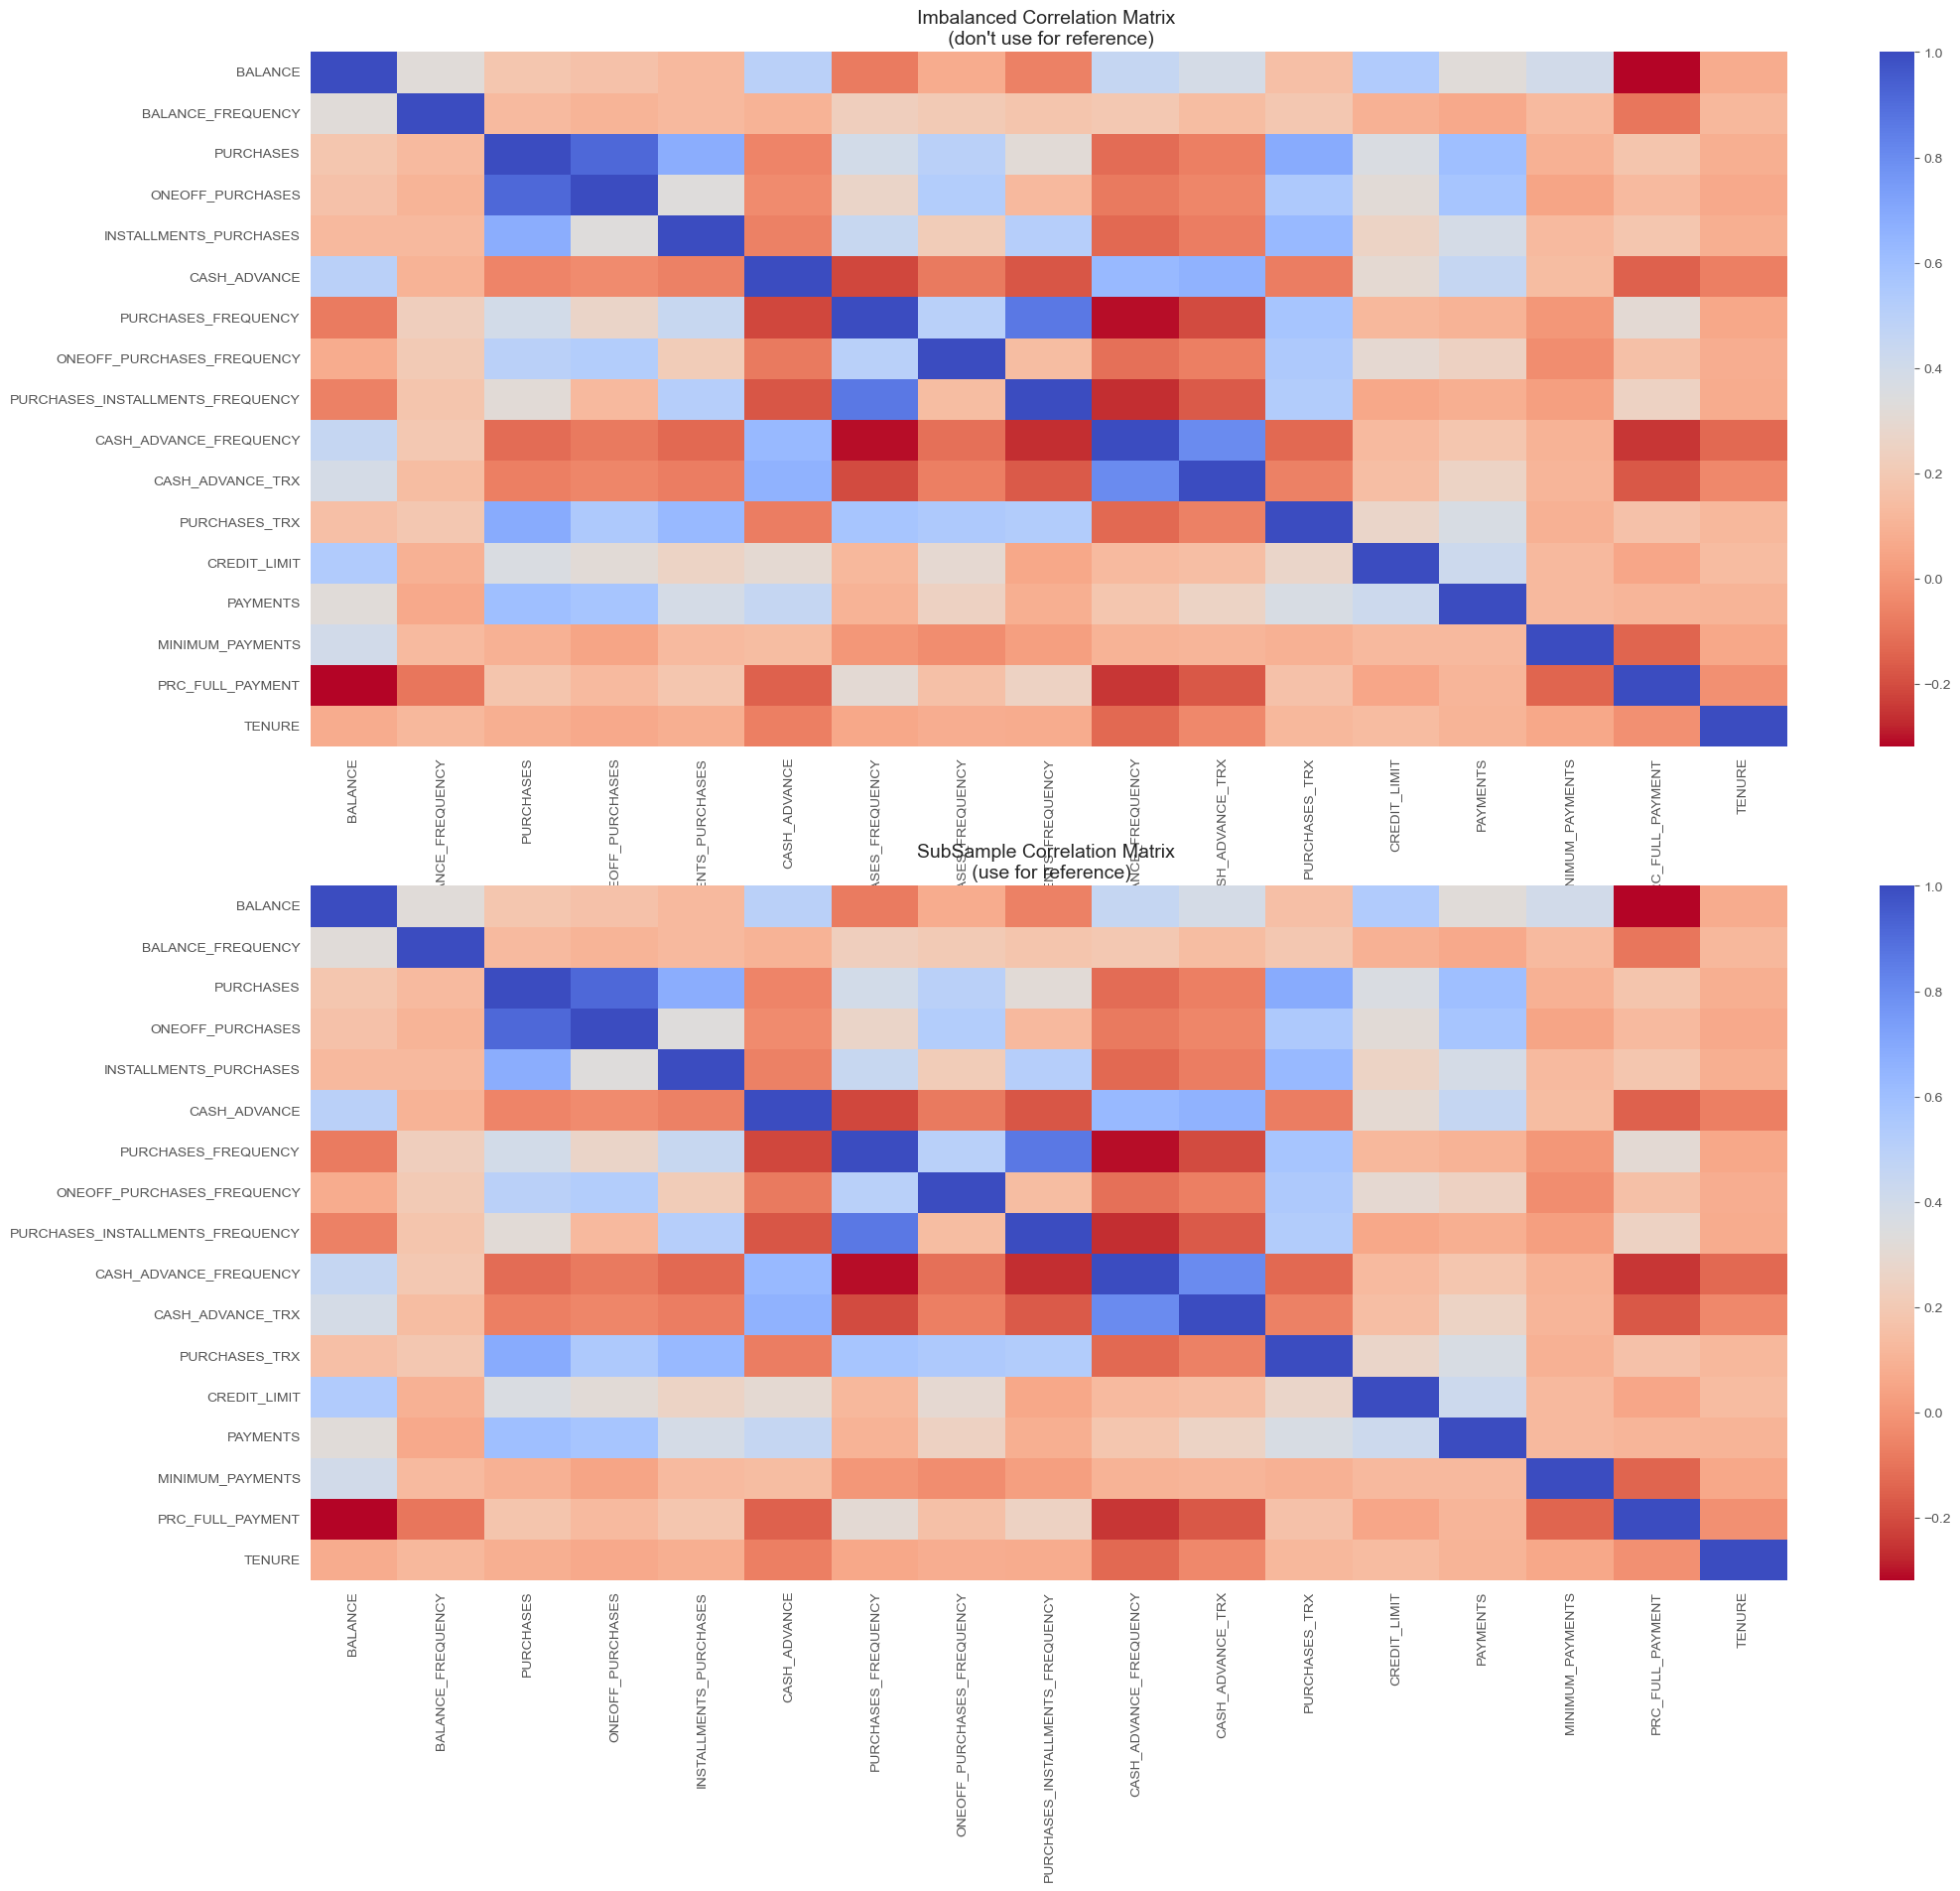

In [9]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24,20))

# Entire DataFrame
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix \n (don't use for reference)", fontsize=14)


sub_sample_corr = new_df.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax2)
ax2.set_title('SubSample Correlation Matrix \n (use for reference)', fontsize=14)
plt.show()

In [10]:
df.shape

(8950, 18)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8950 entries, 3692 to 2434
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PUR

In [12]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [13]:
def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(), x.std(), x.var(), x.min(), 
        x.quantile(0.01), x.quantile(0.05), x.quantile(0.10),x.quantile(0.25),x.quantile(0.50),x.quantile(0.75), 
                              x.quantile(0.90),x.quantile(0.95), x.quantile(0.99),x.max()], 
                     
                  index = ['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1', 
                               'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

In [14]:
nums = df.select_dtypes([np.number])

In [15]:
nums.apply(var_summary).T

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
BALANCE,8950.0,0.0,1.400205e+07,1564.474828,873.385231,2081.531879,4.332775e+06,0.000000,0.065101,8.814518,23.575529,128.281915,873.385231,2054.140036,4338.563657,5909.111808,9338.804814,19043.13856
BALANCE_FREQUENCY,8950.0,0.0,7.851573e+03,0.877271,1.000000,0.236904,5.612351e-02,0.000000,0.090909,0.272727,0.454545,0.888889,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000
PURCHASES,8950.0,0.0,8.978683e+06,1003.204834,361.280000,2136.634782,4.565208e+06,0.000000,0.000000,0.000000,0.000000,39.635000,361.280000,1110.130000,2542.624000,3998.619500,8977.290000,49039.57000
ONEOFF_PURCHASES,8950.0,0.0,5.302314e+06,592.437371,38.000000,1659.887917,2.755228e+06,0.000000,0.000000,0.000000,0.000000,0.000000,38.000000,577.405000,1600.099000,2671.094000,6689.898200,40761.25000
INSTALLMENTS_PURCHASES,8950.0,0.0,3.679055e+06,411.067645,89.000000,904.338115,8.178274e+05,0.000000,0.000000,0.000000,0.000000,0.000000,89.000000,468.637500,1140.070000,1750.087500,3886.240500,22500.00000
CASH_ADVANCE,8950.0,0.0,8.760896e+06,978.871112,0.000000,2097.163877,4.398096e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1113.821139,3065.534560,4647.169122,9588.163357,47137.21176
PURCHASES_FREQUENCY,8950.0,0.0,4.388637e+03,0.490351,0.500000,0.401371,1.610985e-01,0.000000,0.000000,0.000000,0.000000,0.083333,0.500000,0.916667,1.000000,1.000000,1.000000,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.0,1.811996e+03,0.202458,0.083333,0.298336,8.900441e-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.083333,0.300000,0.750000,1.000000,1.000000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.0,3.261714e+03,0.364437,0.166667,0.397448,1.579647e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.750000,1.000000,1.000000,1.000000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.0,1.209541e+03,0.135144,0.000000,0.200121,4.004857e-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.222222,0.416667,0.583333,0.833333,1.50000


In [16]:
df.describe(exclude=[np.number])

,CUST_ID
count,8950
unique,8950
top,C13796
freq,1


<Axes: xlabel='BALANCE', ylabel='PURCHASES'>

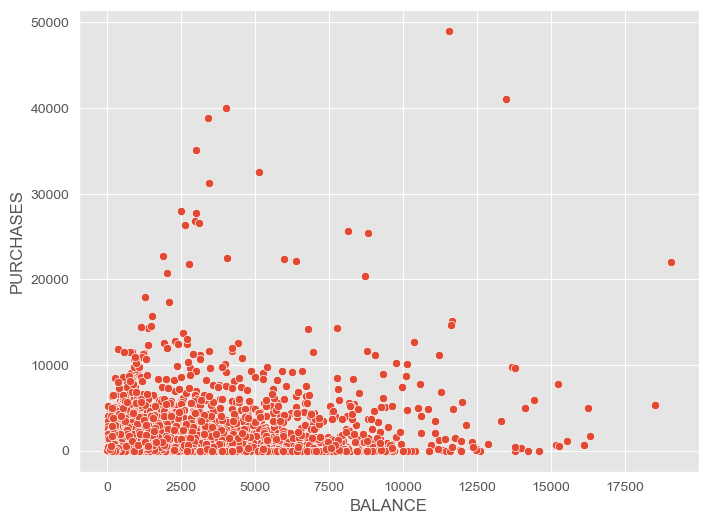

In [17]:
#visualize and show relationship between balance and purchases
sns.scatterplot(x='BALANCE', y='PURCHASES', data=df)

## Scatter Plot Insights

- The scatter plot visualizes the relationship between 'Balance' and 'Purchases'.
- Most data points are concentrated in the bottom-left corner, indicating that both 'Balance' and 'Purchases' are generally low for the majority of instances.
- Moving towards the top-right corner, data points become more dispersed, suggesting higher variability in 'Balance' and 'Purchases'.
- Outliers are observed in the top-left corner, indicating instances with low 'Balance' but high 'Purchases'.
- 'Balance' ranges from 0 to 175,000, while 'Purchases' ranges from 0 to 50,000.

If this data represents a credit card dataset, it implies that most customers have low balances and make low purchases. However, there are a few outliers who make high purchases despite having low balances.



<Axes: xlabel='CREDIT_LIMIT', ylabel='TENURE'>

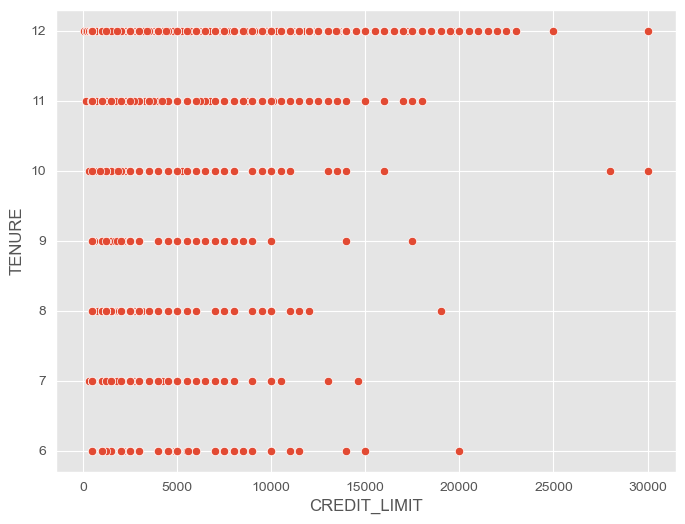

In [18]:
#visualize and show relationship between credit limit and tenure
sns.scatterplot(x='CREDIT_LIMIT', y='TENURE', data=df)

## Scatter Plot Insights

- The graph plots 'Credit Limit' against 'Tenure'.
- Most of the data points are clustered towards the bottom left corner of the graph. This suggests that for most instances, both 'Credit Limit' and 'Tenure' are relatively low.
- There are a few outliers scattered throughout the rest of the graph. These represent instances where either 'Credit Limit' or 'Tenure' is high, but not both.
- The range of 'Credit Limit' is from 0 to 30,000, and the range of 'Tenure' is from 6 to 12.

If this data is from a credit card dataset, we might infer that most customers have low credit limits and short tenures, while only a few have high credit limits or long tenures.


In [19]:
#now we can drop the unique column
df.drop('CUST_ID', axis=1, inplace=True)

# Q2. Exploratory Data Analysis Tasks (6 marks)

a. Missing Value Analysis
b. Outlier Treatment using the Z-score method
c. Deal with correlated variables


In [22]:
# a. Missing Value Analysis
df.isnull().sum() 

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [24]:
percent_missing = (df.isnull().sum()/len(df))*100
percent_missing

BALANCE                             0.000000
BALANCE_FREQUENCY                   0.000000
PURCHASES                           0.000000
ONEOFF_PURCHASES                    0.000000
INSTALLMENTS_PURCHASES              0.000000
CASH_ADVANCE                        0.000000
PURCHASES_FREQUENCY                 0.000000
ONEOFF_PURCHASES_FREQUENCY          0.000000
PURCHASES_INSTALLMENTS_FREQUENCY    0.000000
CASH_ADVANCE_FREQUENCY              0.000000
CASH_ADVANCE_TRX                    0.000000
PURCHASES_TRX                       0.000000
CREDIT_LIMIT                        0.011173
PAYMENTS                            0.000000
MINIMUM_PAYMENTS                    3.497207
PRC_FULL_PAYMENT                    0.000000
TENURE                              0.000000
dtype: float64

##### lets treat missing values

In [25]:
df[df['CREDIT_LIMIT'].isnull()]

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
5203,18.400472,0.166667,0.0,0.0,0.0,186.853063,0.0,0.0,0.0,0.166667,1,0,NaN,9.040017,14.418723,0.0,6


In [26]:
df = df.drop(5203)

In [27]:
# resetting the index after dropping the record:
df = df.reset_index(drop=True)

In [28]:
df['MINIMUM_PAYMENTS']= df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median())

In [31]:
df.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [32]:
# b. Outlier Treatment using the Z-score method

In [33]:
num_vars = df.columns
num_vars

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

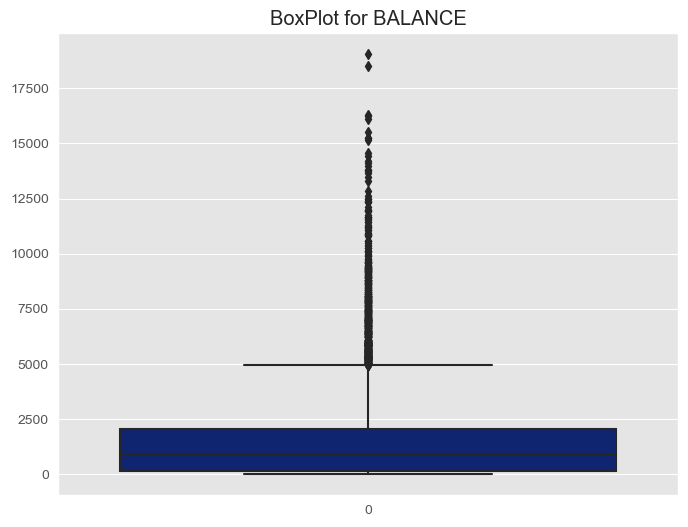

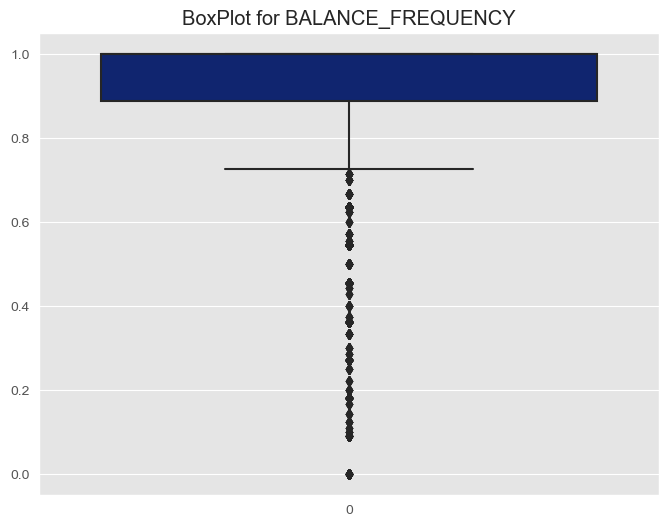

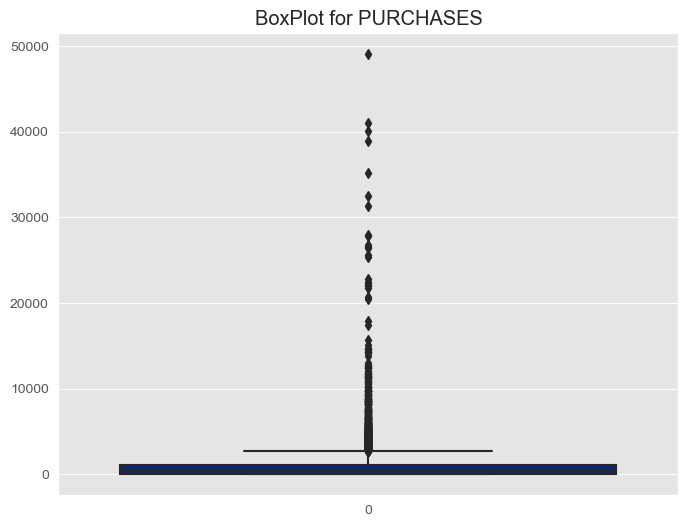

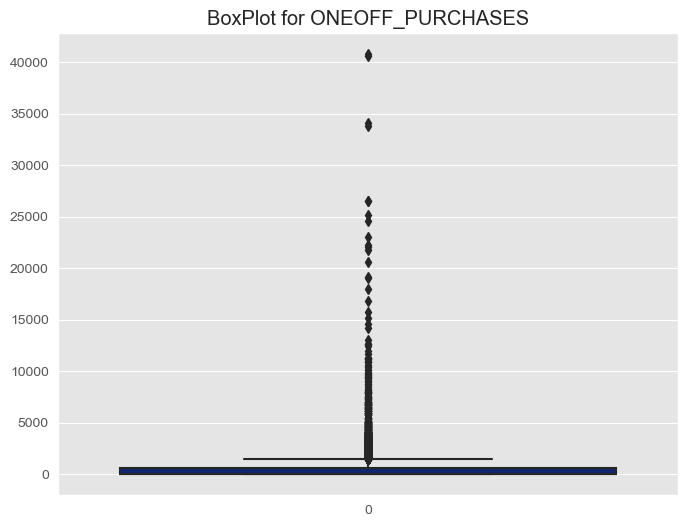

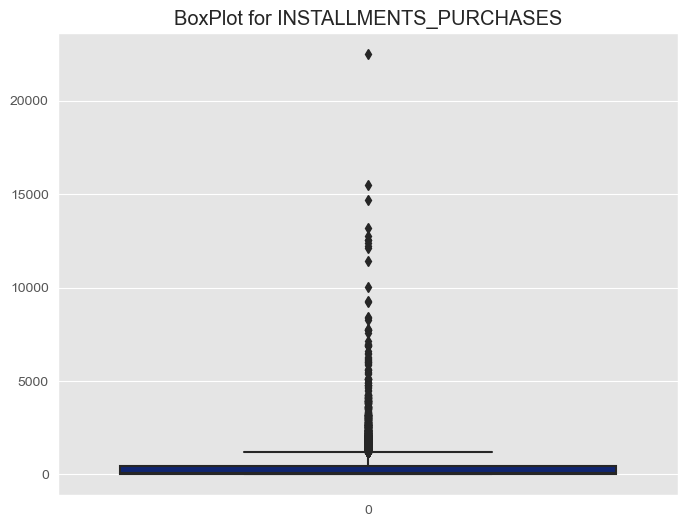

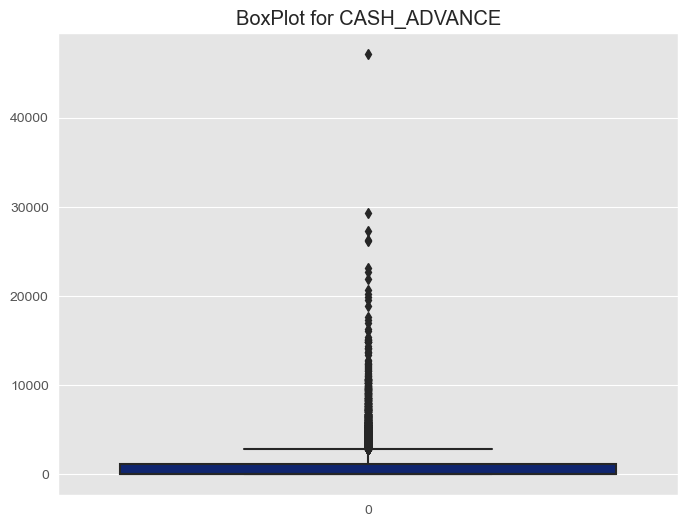

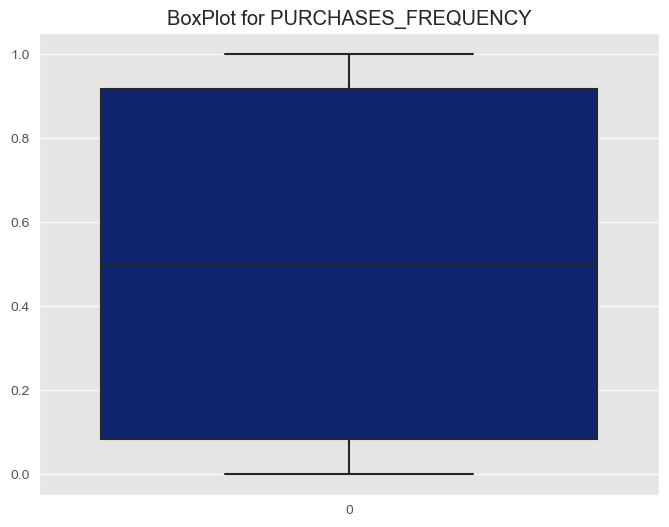

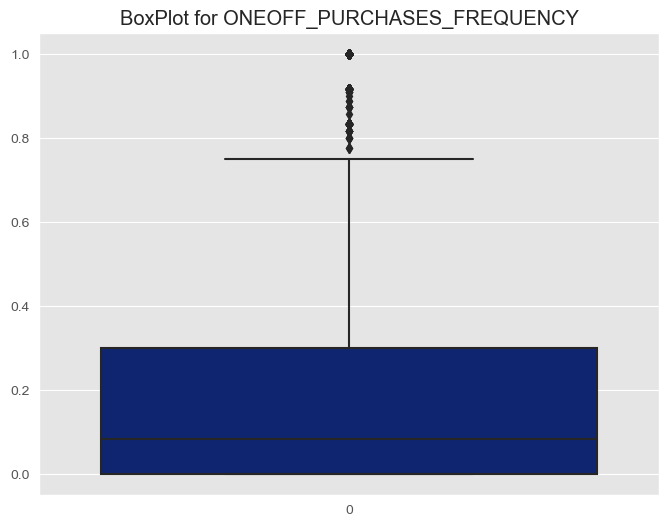

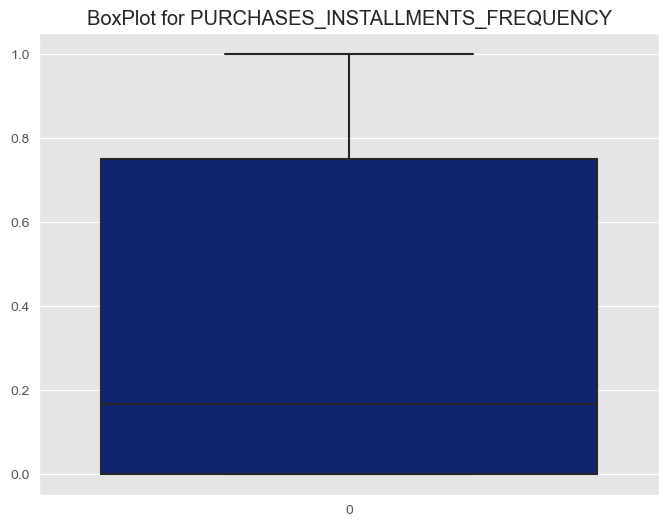

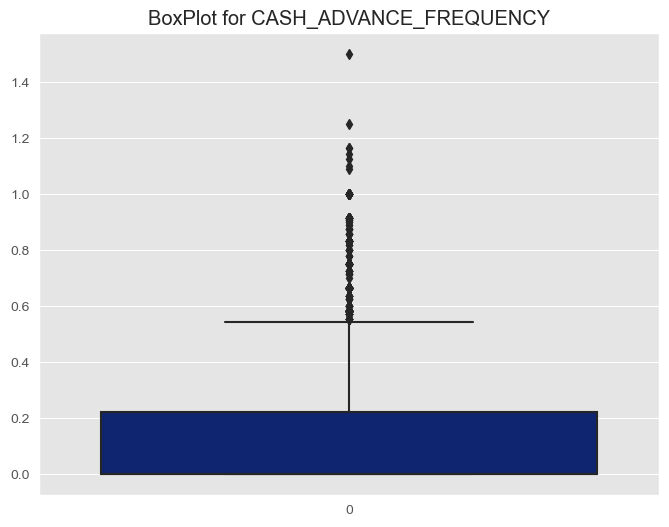

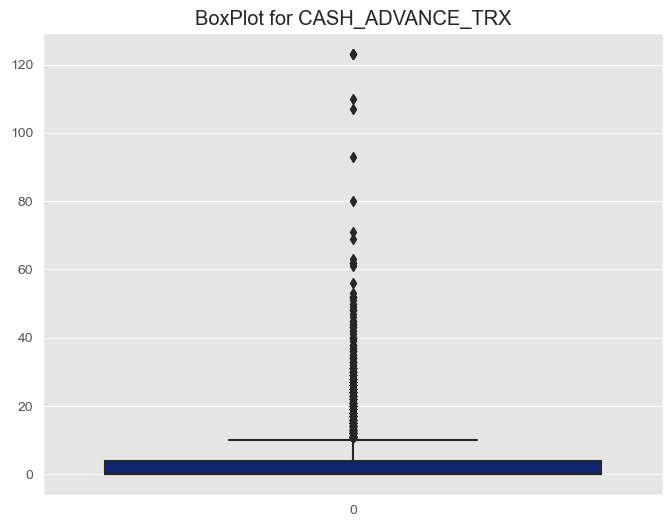

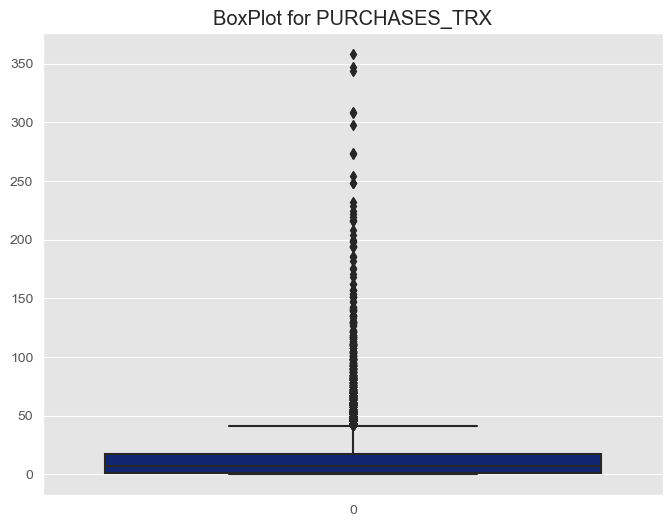

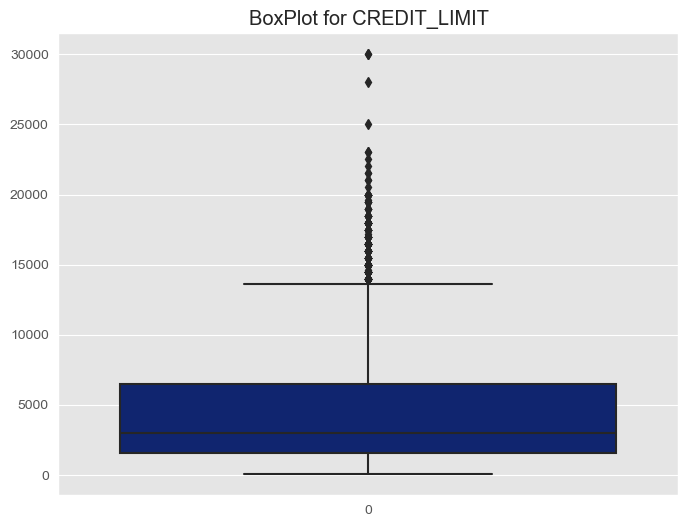

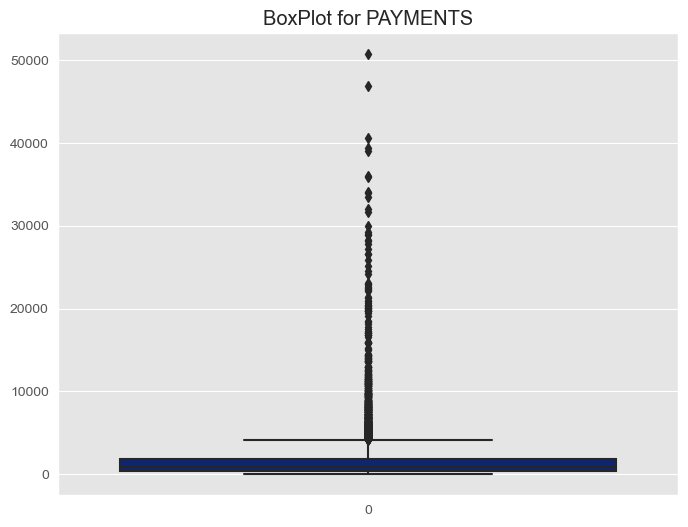

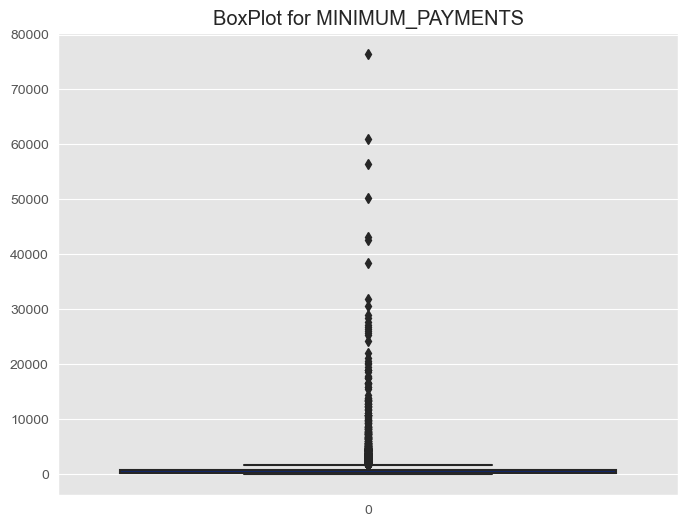

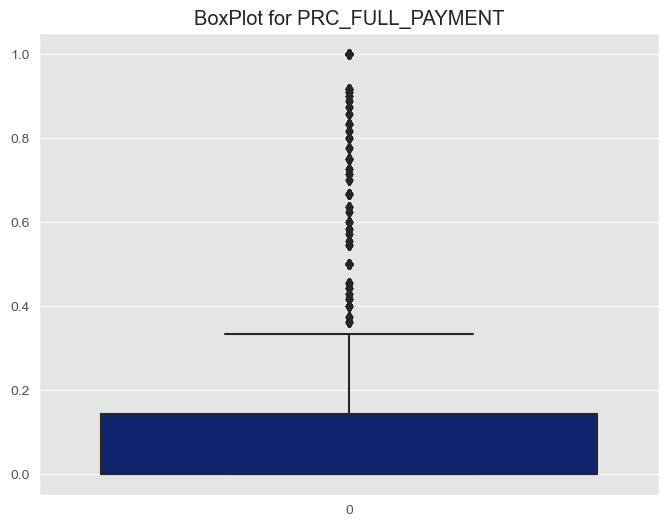

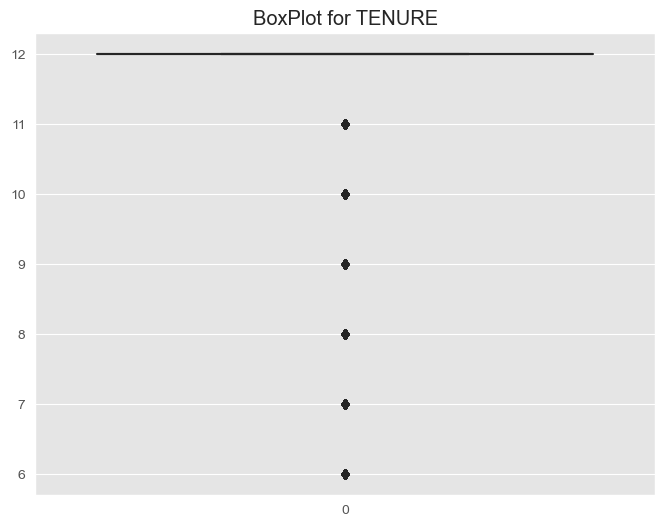

In [35]:
# lets visulize using box plot
for i in num_vars:
    sns.boxplot(df[i], palette='dark')
    plt.title('BoxPlot for {}'.format(i))
    plt.show()

##### lets treat outliers

In [37]:
# z score method
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df))
print(z)

       BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     0.701155           0.517980   0.206979          0.327161   
1     0.747579           1.401674   0.229676          0.144591   
2     0.734487           0.517980   0.374854          0.356957   
3     0.692422           0.134049   0.209380          0.356957   
4     2.049541           0.517980   1.439521          0.051512   
...        ...                ...        ...               ...   
8944  2.095728           0.249881   0.469584          0.356957   
8945  0.135150           0.517980   0.008936          0.253575   
8946  0.704603           0.517980   0.348663          0.356957   
8947  0.688845           0.517980   0.192865          0.356957   
8948  0.093997           0.517980   0.225594          0.272613   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                   0.111811      0.466805             1.269742   
1                   0.277580      0.466805             0.023907   
2     

In [38]:
threshold = 3
print(np.where(z > 3))

(array([   4,    7,   16, ..., 8944, 8946, 8947], dtype=int64), array([ 4, 16,  2, ...,  5, 16, 16], dtype=int64))


In [39]:
df = df[(z < 3).all(axis=1)]
df.shape

(7434, 17)

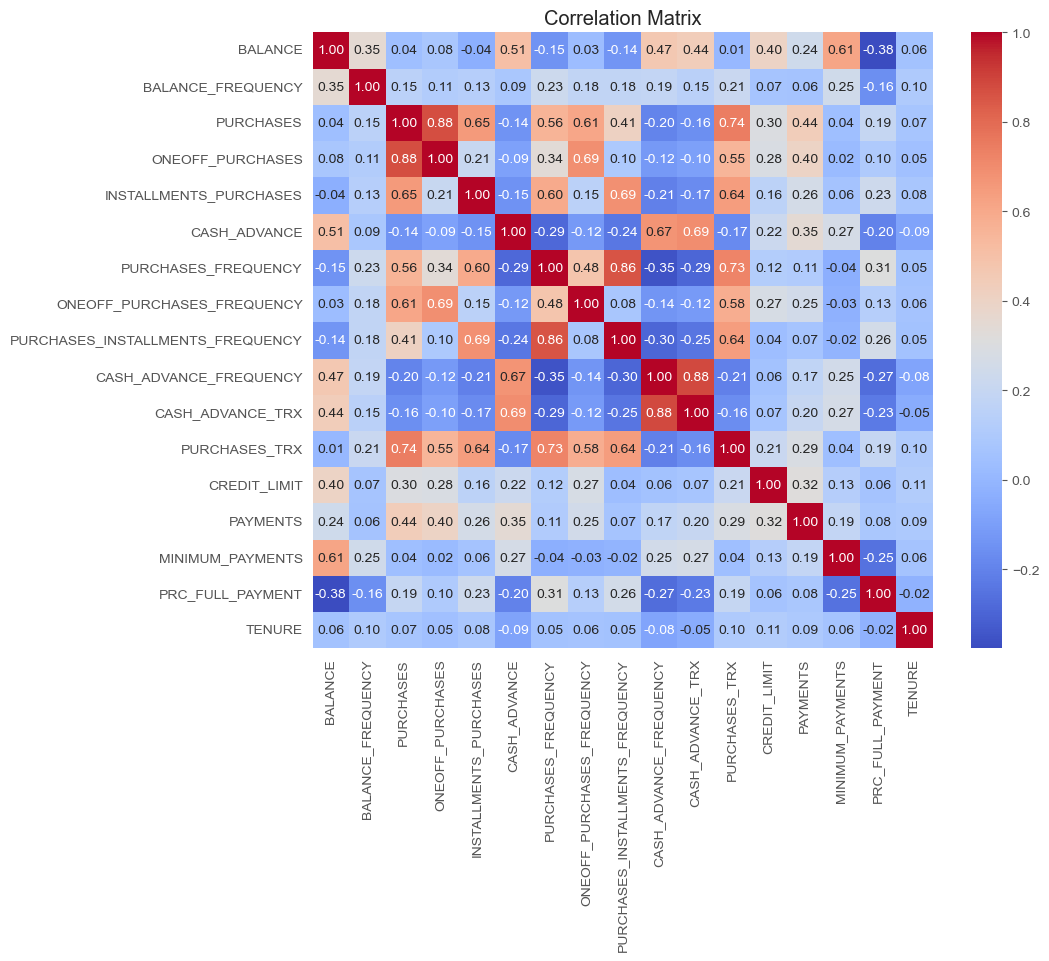

In [41]:
# c. Deal with correlated variables
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Visualize the correlation matrix (optional)
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# Identify highly correlated variable pairs (e.g., with a threshold of 0.7)
highly_correlated = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.7:
            colname_i = correlation_matrix.columns[i]
            colname_j = correlation_matrix.columns[j]
            highly_correlated.add((colname_i, colname_j))



In [42]:
#lets drop the highly correlated variables
df.drop(['PURCHASES_FREQUENCY','PURCHASES_INSTALLMENTS_FREQUENCY','CASH_ADVANCE_FREQUENCY','TENURE'], axis=1, inplace=True)

In [43]:
df.shape

(7434, 13)

# Q3. Perform dimensionality reduction using PCA such that the 95% of the variance is explained🡪2 marks


In [44]:
#lets perform PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
pca.fit(df)

PCA(n_components=0.95)

In [45]:
pca.n_components_

5

In [46]:
#lets check the variance ratio
pca.explained_variance_ratio_

array([0.57163716, 0.15955244, 0.12957756, 0.07011024, 0.0354109 ])

In [47]:
#lets check the cumulative variance ratio
np.cumsum(pca.explained_variance_ratio_)

array([0.57163716, 0.7311896 , 0.86076716, 0.93087739, 0.96628829])

In [48]:
#lets transform the data
X_pca = pca.transform(df)
X_pca.shape

(7434, 5)

In [49]:
#lets create a dataframe
df_pca = pd.DataFrame(X_pca)
df_pca.head()

,0,1,2,3,4
0,8458.264501,-4380.215139,-1170.865504,808.662409,-75.165373
1,-1947.534903,-916.734318,118.414626,324.596864,64.945128
2,-3522.437037,-497.364030,-360.365119,87.064262,-4.970184
3,1562.911028,-1920.582682,399.096716,400.033748,223.461763
4,-334.337162,-1632.590691,-1140.807022,545.219728,105.021011


In [50]:
#lets check the correlation matrix
df_pca.corr()

,0,1,2,3,4
0,1.000000e+00,6.884270e-17,-2.239000e-16,-5.007954e-16,-2.375542e-16
1,6.884270e-17,1.000000e+00,2.512177e-16,-5.761365e-16,1.501479e-17
2,-2.239000e-16,2.512177e-16,1.000000e+00,1.267315e-16,-2.914836e-16
3,-5.007954e-16,-5.761365e-16,1.267315e-16,1.000000e+00,1.507462e-16
4,-2.375542e-16,1.501479e-17,-2.914836e-16,1.507462e-16,1.000000e+00


# Q4. Find the optimum value of k for k-means clustering using the elbow method. Plot the elbow curve🡪2 marks

In [51]:
#lets perform kmeans clustering
from sklearn.cluster import KMeans

In [52]:
#lets check the inertia
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(df_pca)
    inertia.append(kmeans.inertia_)

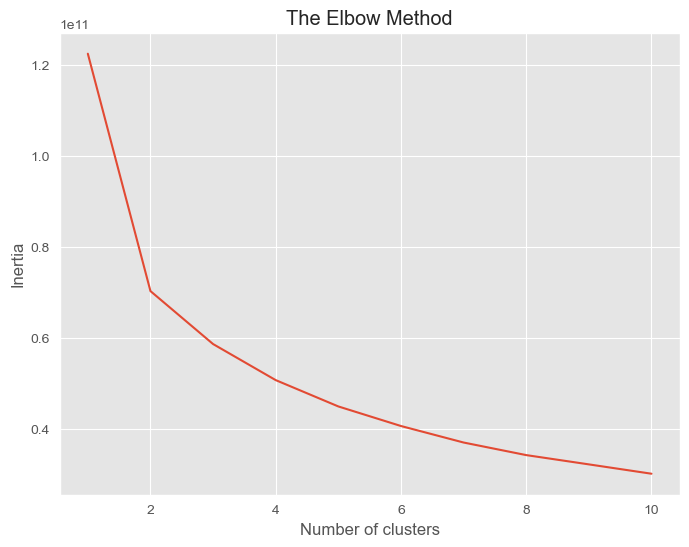

In [53]:
#lets plot the inertia
plt.plot(range(1, 11), inertia)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

# Q5. Find the optimum value of k for k-means clustering using the silhouette score method. Build a K-means clustering model and specify the number of observations in each cluster using a bar plot🡪5 marks

In [55]:
#silhoutte score method to find optimum value of k
from sklearn.metrics import silhouette_score

In [56]:
#lets check the silhoutte score
sil = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(df_pca)
    sil.append(silhouette_score(df_pca, kmeans.labels_))

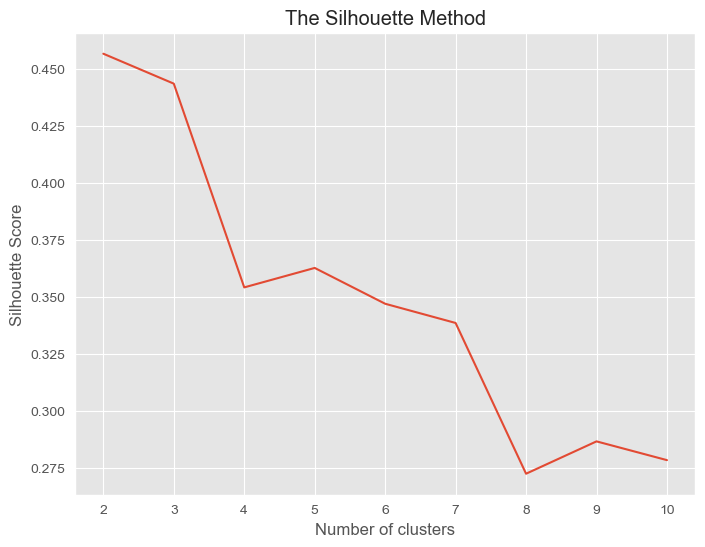

In [57]:
#lets plot the silhoutte score
plt.plot(range(2, 11), sil)
plt.title('The Silhouette Method')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [85]:
#lets perform kmeans clustering with k=2
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(df_pca)


KMeans(n_clusters=2, random_state=0)

In [86]:
#lets check the labels
kmeans.labels_

array([1, 0, 0, ..., 0, 0, 0])

In [87]:
#lets check the cluster centers
kmeans.cluster_centers_

array([[-1.78369756e+03,  3.38263205e+01,  2.52845054e+01,
        -1.26050669e+00,  4.23953552e-01],
       [ 3.92936045e+03, -7.45170085e+01, -5.56999898e+01,
         2.77680770e+00, -9.33939901e-01]])

In [88]:
#lets check the number of observations in each cluster
pd.Series(kmeans.labels_).value_counts()

0    5111
1    2323
dtype: int64

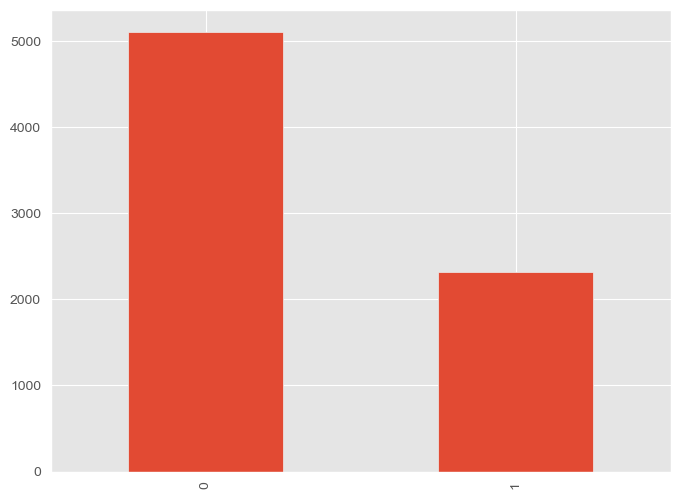

In [89]:
#lets plot the bar plot
pd.Series(kmeans.labels_).value_counts().plot(kind='bar')
plt.show()

In [90]:
#give me value count of the bar graph
pd.Series(kmeans.labels_).value_counts()

0    5111
1    2323
dtype: int64

In [70]:
#lets add the cluster labels to the original dataset
df['cluster'] = kmeans.labels_
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,ONEOFF_PURCHASES_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,cluster
0,105.216147,1.000000,1445.55,1135.55,310.00,0.0,1.000000,0,32,13500.0,1267.655533,179.377143,0.900000,1
1,8.585976,0.545455,512.59,352.50,160.09,0.0,0.083333,0,10,2500.0,908.190297,67.458687,0.250000,0
2,35.836652,1.000000,202.40,0.00,202.40,0.0,0.000000,0,11,1000.0,203.624113,229.361230,0.333333,0
3,123.394089,0.909091,1450.68,0.00,1450.68,0.0,0.000000,0,20,6000.0,1583.421932,137.826186,0.454545,1
5,4.383989,0.545455,96.50,0.00,96.50,0.0,0.000000,0,6,4500.0,217.143643,66.781434,1.000000,0


In [71]:
#lets check the number of observations in each cluster
df['cluster'].value_counts()

0    5111
1    2323
Name: cluster, dtype: int64

In [72]:
#lets check the mean of each variable in each cluster
df.groupby('cluster').mean()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,ONEOFF_PURCHASES_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
cluster,,,,,,,,,,,,,
0,825.954705,0.874763,550.716584,278.768075,272.261366,450.129233,0.141568,1.974956,10.033849,2341.883628,955.91259,479.116932,0.151532
1,2246.437790,0.922392,1198.452815,766.818648,431.792871,1160.017081,0.304060,3.061558,16.510977,7646.853598,2049.26123,793.886951,0.161252


<Axes: xlabel='cluster'>

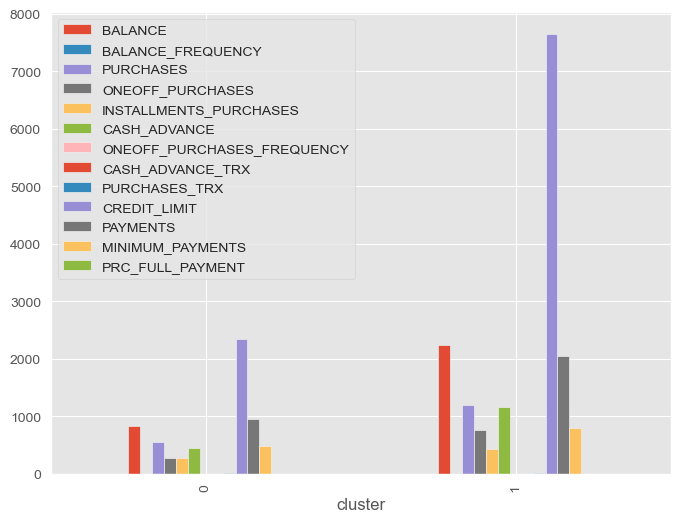

In [83]:
#plot the bar plot of the cluster considering the means
df.groupby('cluster').mean().plot(kind='bar')

Based on the credit card data you've shared, it appears that there are two distinct clusters of credit card users:

1. **Cluster 0: Low-Spending Users**
   - These users typically have a lower balance of around 826 dollars.
   - Their credit limit is also lower, averaging around 2,342 dollars.
   - They make purchases worth approximately 551 dollars, with one-off purchases amounting to about 279 dollars and installment purchases around 272 dollars.
   - They take cash advances of about 450 dollars and make around 2 cash advance transactions.
   - They make around 10 purchase transactions.
   - Their average payments are about 956 dollars, with minimum payments of approximately 479 dollars.
   - They pay their full balance about 15% of the time.

2. **Cluster 1: High-Spending Users**
   - These users typically have a higher balance of around 2,246 dollars.
   - Their credit limit is significantly higher, averaging around 7,647 dollars.
   - They make purchases worth approximately 1,198 dollars, with one-off purchases amounting to about 767 dollars and installment purchases around 432 dollars.
   - They take cash advances of about 1,160 dollars and make around 3 cash advance transactions.
   - They make around 17 purchase transactions.
   - Their average payments are about 2,049 dollars, with minimum payments of approximately 794 dollars.
   - They pay their full balance about 16% of the time.

These profiles can help in understanding the spending habits and financial behavior of different types of credit card users. However, it's important to note that these are average values, and individual behavior may vary. Also, these insights are based on the provided data and may not be representative of all credit card users.
